<a href="https://colab.research.google.com/github/rajsaumyaa/greenhouse_gas_emission_prediction/blob/main/GHG_Analysis_and_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Greenhouse Gas Emission Analysis and Prediction:**

This project analyzes and predicts greenhouse gas emissions using data from commodity and industry sources between 2010 and 2016.

It performs:


*  Data cleaning and preprocessing
*  Exploratory Data Analysis (EDA)
*  Visualization of emission trends
*  Machine learning model to predict emissions




**Data Source**: https://catalog.data.gov/dataset/supply-chain-greenhouse-gas-emission-factors-for-us-industries-and-commodities



**Data cleaning and combining**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving SupplyChainEmissionFactorsforUSIndustriesCommodities.xlsx to SupplyChainEmissionFactorsforUSIndustriesCommodities.xlsx


In [ ]:
import pandas as pd

# Load Excel file
file_name = list(uploaded.keys())[0]
xls = pd.ExcelFile(file_name)

# Display sheet names
sheet_names = xls.sheet_names
sheet_names

['Cover',
 'Contents',
 'Data Dictionary',
 'Sources',
 'LCIA Factors of Other GHGs',
 '2016_Summary_Commodity',
 '2015_Summary_Commodity',
 '2014_Summary_Commodity',
 '2013_Summary_Commodity',
 '2012_Summary_Commodity',
 '2011_Summary_Commodity',
 '2010_Summary_Commodity',
 '2016_Summary_Industry',
 '2015_Summary_Industry',
 '2014_Summary_Industry',
 '2013_Summary_Industry',
 '2012_Summary_Industry',
 '2011_Summary_Industry',
 '2010_Summary_Industry',
 '2016_Detail_Commodity',
 '2015_Detail_Commodity',
 '2014_Detail_Commodity',
 '2013_Detail_Commodity',
 '2012_Detail_Commodity',
 '2011_Detail_Commodity',
 '2010_Detail_Commodity',
 '2016_Detail_Industry',
 '2015_Detail_Industry',
 '2014_Detail_Industry',
 '2013_Detail_Industry',
 '2012_Detail_Industry',
 '2011_Detail_Industry',
 '2010_Detail_Industry']

In [ ]:
summary_data = []

# Loop through sheets for 2010–2016
for year in range(2010, 2017):
    for category in ['Commodity', 'Industry']:
        sheet_name = f'{year}_Summary_{category}'
        if sheet_name in sheet_names:
            df = xls.parse(sheet_name)
            df['Year'] = year
            df['Type'] = category
            summary_data.append(df)

# Combine into one DataFrame
combined_df = pd.concat(summary_data, ignore_index=True)

# Display the shape and preview
print("Combined shape:", combined_df.shape)
combined_df.head()


Combined shape: (3696, 17)


,Commodity Code,Commodity Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Year,Type,Industry Code,Industry Name
0,111CA,Farms,carbon dioxide,"kg/2018 USD, purchaser price",0.526,0.061,0.588,NaN,4,3,1,4,1,2010,Commodity,NaN,NaN
1,111CA,Farms,methane,"kg/2018 USD, purchaser price",0.029,0.001,0.030,NaN,4,3,1,1,1,2010,Commodity,NaN,NaN
2,111CA,Farms,nitrous oxide,"kg/2018 USD, purchaser price",0.003,0.000,0.003,NaN,4,3,1,4,1,2010,Commodity,NaN,NaN
3,111CA,Farms,other GHGs,"kg CO2e/2018 USD, purchaser price",0.005,0.000,0.005,NaN,3,3,1,3,1,2010,Commodity,NaN,NaN
4,113FF,"Forestry, fishing, and related activities",carbon dioxide,"kg/2018 USD, purchaser price",0.256,0.032,0.288,NaN,4,3,1,4,1,2010,Commodity,NaN,NaN


In [ ]:
combined_df.to_csv("Combined_Summary_Data.csv", index=False)
files.download("Combined_Summary_Data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
import pandas as pd

# 🔹 Step 1: Upload the Excel file
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
xls = pd.ExcelFile(file_name)


Saving SupplyChainEmissionFactorsforUSIndustriesCommodities.xlsx to SupplyChainEmissionFactorsforUSIndustriesCommodities (1).xlsx


In [ ]:
# 🔹 Step 2: Extract and combine summary and detail data
all_data = []

for year in range(2010, 2017):
    for category in ['Commodity', 'Industry']:
        for level in ['Summary', 'Detail']:
            sheet_name = f"{year}_{level}_{category}"
            if sheet_name in xls.sheet_names:
                df = xls.parse(sheet_name)
                df['Year'] = year
                df['Type'] = category
                df['Level'] = level
                all_data.append(df)

# Combine all into one DataFrame
combined_df = pd.concat(all_data, ignore_index=True)
print("Combined data shape:", combined_df.shape)
combined_df.head()


Combined data shape: (25788, 18)


,Commodity Code,Commodity Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Year,Type,Level,Industry Code,Industry Name
0,111CA,Farms,carbon dioxide,"kg/2018 USD, purchaser price",0.526,0.061,0.588,NaN,4,3,1,4,1,2010,Commodity,Summary,NaN,NaN
1,111CA,Farms,methane,"kg/2018 USD, purchaser price",0.029,0.001,0.030,NaN,4,3,1,1,1,2010,Commodity,Summary,NaN,NaN
2,111CA,Farms,nitrous oxide,"kg/2018 USD, purchaser price",0.003,0.000,0.003,NaN,4,3,1,4,1,2010,Commodity,Summary,NaN,NaN
3,111CA,Farms,other GHGs,"kg CO2e/2018 USD, purchaser price",0.005,0.000,0.005,NaN,3,3,1,3,1,2010,Commodity,Summary,NaN,NaN
4,113FF,"Forestry, fishing, and related activities",carbon dioxide,"kg/2018 USD, purchaser price",0.256,0.032,0.288,NaN,4,3,1,4,1,2010,Commodity,Summary,NaN,NaN


**Data Preprocessing**

In [ ]:
# Standardize column names
combined_df.columns = combined_df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('[^0-9a-zA-Z_]', '')

# Preview columns
combined_df.columns.tolist()


['commodity_code',
 'commodity_name',
 'substance',
 'unit',
 'supply_chain_emission_factors_without_margins',
 'margins_of_supply_chain_emission_factors',
 'supply_chain_emission_factors_with_margins',
 'unnamed:_7',
 'dq_reliabilityscore_of_factors_without_margins',
 'dq_temporalcorrelation_of_factors_without_margins',
 'dq_geographicalcorrelation_of_factors_without_margins',
 'dq_technologicalcorrelation_of_factors_without_margins',
 'dq_datacollection_of_factors_without_margins',
 'year',
 'type',
 'level',
 'industry_code',
 'industry_name']

In [ ]:
# Drop columns where all values are NaN
combined_df = combined_df.dropna(axis=1, how='all')


In [ ]:
# Check missing values
missing_info = combined_df.isnull().sum()
print("Missing values per column:\n", missing_info[missing_info > 0])

# Strategy 1: Fill missing numeric with 0
combined_df.fillna(0, inplace=True)

# OR Strategy 2: Drop rows with critical missing data
# combined_df = combined_df.dropna(subset=["column_name"])


Missing values per column:
 commodity_code    12908
commodity_name    12908
industry_code     12880
industry_name     12880
dtype: int64


In [ ]:
# Find object-type columns (which may be numeric in disguise)
object_cols = combined_df.select_dtypes(include='object').columns

# Attempt conversion to numeric where possible
for col in object_cols:
    try:
        combined_df[col] = pd.to_numeric(combined_df[col])
    except Exception:
        pass  # Keep column as-is if conversion fails



In [ ]:
combined_df['type'] = combined_df['type'].str.lower()
combined_df['level'] = combined_df['level'].str.lower()


In [ ]:
combined_df = combined_df.drop_duplicates()


In [ ]:
combined_df.info()
combined_df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25788 entries, 0 to 25787
Data columns (total 17 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   commodity_code                                          25788 non-null  object 
 1   commodity_name                                          25788 non-null  object 
 2   substance                                               25788 non-null  object 
 3   unit                                                    25788 non-null  object 
 4   supply_chain_emission_factors_without_margins           25788 non-null  float64
 5   margins_of_supply_chain_emission_factors                25788 non-null  float64
 6   supply_chain_emission_factors_with_margins              25788 non-null  float64
 7   dq_reliabilityscore_of_factors_without_margins          25788 non-null  int64  
 8   dq_temporalcorrelation_of_factors_wi

,commodity_code,commodity_name,substance,unit,supply_chain_emission_factors_without_margins,margins_of_supply_chain_emission_factors,supply_chain_emission_factors_with_margins,dq_reliabilityscore_of_factors_without_margins,dq_temporalcorrelation_of_factors_without_margins,dq_geographicalcorrelation_of_factors_without_margins,dq_technologicalcorrelation_of_factors_without_margins,dq_datacollection_of_factors_without_margins,year,type,level,industry_code,industry_name
0,111CA,Farms,carbon dioxide,"kg/2018 USD, purchaser price",0.526,0.061,0.588,4,3,1,4,1,2010,commodity,summary,0,0
1,111CA,Farms,methane,"kg/2018 USD, purchaser price",0.029,0.001,0.030,4,3,1,1,1,2010,commodity,summary,0,0
2,111CA,Farms,nitrous oxide,"kg/2018 USD, purchaser price",0.003,0.000,0.003,4,3,1,4,1,2010,commodity,summary,0,0
3,111CA,Farms,other GHGs,"kg CO2e/2018 USD, purchaser price",0.005,0.000,0.005,3,3,1,3,1,2010,commodity,summary,0,0
4,113FF,"Forestry, fishing, and related activities",carbon dioxide,"kg/2018 USD, purchaser price",0.256,0.032,0.288,4,3,1,4,1,2010,commodity,summary,0,0


In [2]:
from google.colab import files
import pandas as pd

uploaded = files.upload()
file_name = list(uploaded.keys())[0]
xls = pd.ExcelFile(file_name)



Saving SupplyChainEmissionFactorsforUSIndustriesCommodities.xlsx to SupplyChainEmissionFactorsforUSIndustriesCommodities.xlsx


In [3]:
all_data = []

for year in range(2010, 2017):
    for category in ['Commodity', 'Industry']:
        for level in ['Summary', 'Detail']:
            sheet_name = f"{year}_{level}_{category}"
            if sheet_name in xls.sheet_names:
                df = xls.parse(sheet_name)
                df['Year'] = year
                df['Type'] = category
                df['Level'] = level
                all_data.append(df)

combined_df = pd.concat(all_data, ignore_index=True)


In [5]:
# Clean column names
combined_df.columns = (
    combined_df.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.replace('[^0-9a-zA-Z_]', '', regex=True)
)

# Drop all-empty columns
combined_df = combined_df.dropna(axis=1, how='all')

# Try converting object columns to numeric where possible
object_cols = combined_df.select_dtypes(include='object').columns
for col in object_cols:
    try:
        combined_df[col] = pd.to_numeric(combined_df[col])
    except:
        pass  # Keep non-convertible as-is

# Normalize category columns safely using .loc
combined_df.loc[:, 'type'] = combined_df['type'].str.lower()
combined_df.loc[:, 'level'] = combined_df['level'].str.lower()

# Drop duplicates (optional but safe)
combined_df = combined_df.drop_duplicates()

combined_df['level'] = combined_df['level'].str.lower()

In [6]:
print("Shape:", combined_df.shape)
combined_df.info()
combined_df.head()


Shape: (25788, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25788 entries, 0 to 25787
Data columns (total 17 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   commodity_code                                          12880 non-null  object 
 1   commodity_name                                          12880 non-null  object 
 2   substance                                               25788 non-null  object 
 3   unit                                                    25788 non-null  object 
 4   supply_chain_emission_factors_without_margins           25788 non-null  float64
 5   margins_of_supply_chain_emission_factors                25788 non-null  float64
 6   supply_chain_emission_factors_with_margins              25788 non-null  float64
 7   dq_reliabilityscore_of_factors_without_margins          25788 non-null  int64  
 8   dq_temporalcorrel

,commodity_code,commodity_name,substance,unit,supply_chain_emission_factors_without_margins,margins_of_supply_chain_emission_factors,supply_chain_emission_factors_with_margins,dq_reliabilityscore_of_factors_without_margins,dq_temporalcorrelation_of_factors_without_margins,dq_geographicalcorrelation_of_factors_without_margins,dq_technologicalcorrelation_of_factors_without_margins,dq_datacollection_of_factors_without_margins,year,type,level,industry_code,industry_name
0,111CA,Farms,carbon dioxide,"kg/2018 USD, purchaser price",0.526,0.061,0.588,4,3,1,4,1,2010,commodity,summary,NaN,NaN
1,111CA,Farms,methane,"kg/2018 USD, purchaser price",0.029,0.001,0.030,4,3,1,1,1,2010,commodity,summary,NaN,NaN
2,111CA,Farms,nitrous oxide,"kg/2018 USD, purchaser price",0.003,0.000,0.003,4,3,1,4,1,2010,commodity,summary,NaN,NaN
3,111CA,Farms,other GHGs,"kg CO2e/2018 USD, purchaser price",0.005,0.000,0.005,3,3,1,3,1,2010,commodity,summary,NaN,NaN
4,113FF,"Forestry, fishing, and related activities",carbon dioxide,"kg/2018 USD, purchaser price",0.256,0.032,0.288,4,3,1,4,1,2010,commodity,summary,NaN,NaN


**Data Visualization**

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style='whitegrid')


In [8]:
[col for col in combined_df.columns if any(k in col for k in ['emission', 'ghg', 'co2'])]


['supply_chain_emission_factors_without_margins',
 'margins_of_supply_chain_emission_factors',
 'supply_chain_emission_factors_with_margins']

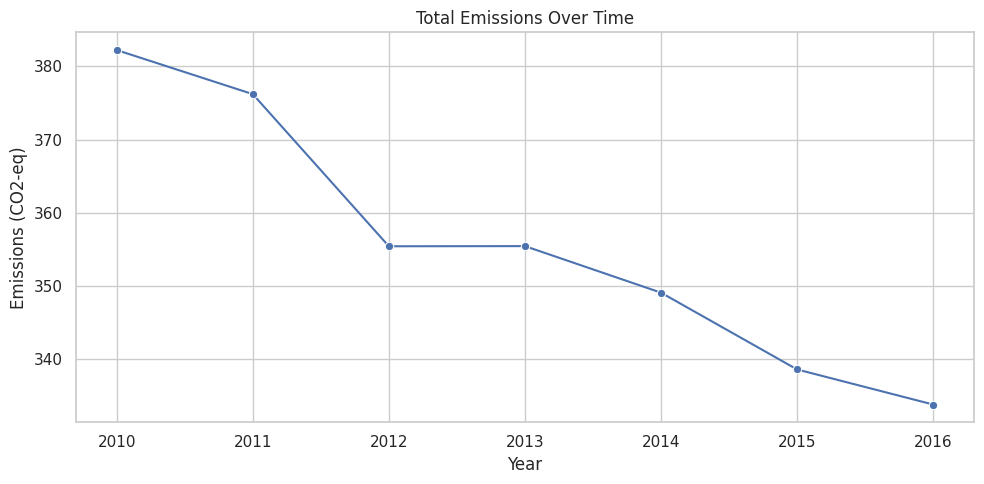

In [12]:
emission_col = 'supply_chain_emission_factors_with_margins'


yearly_emissions = combined_df.groupby('year')[emission_col].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=yearly_emissions, x='year', y=emission_col, marker='o')
plt.title("Total Emissions Over Time")
plt.ylabel("Emissions (CO2-eq)")
plt.xlabel("Year")
plt.grid(True)
plt.tight_layout()
plt.show()


In [13]:
combined_df.columns.tolist()


['commodity_code',
 'commodity_name',
 'substance',
 'unit',
 'supply_chain_emission_factors_without_margins',
 'margins_of_supply_chain_emission_factors',
 'supply_chain_emission_factors_with_margins',
 'dq_reliabilityscore_of_factors_without_margins',
 'dq_temporalcorrelation_of_factors_without_margins',
 'dq_geographicalcorrelation_of_factors_without_margins',
 'dq_technologicalcorrelation_of_factors_without_margins',
 'dq_datacollection_of_factors_without_margins',
 'year',
 'type',
 'level',
 'industry_code',
 'industry_name']

/tmp/ipython-input-15-3335378252.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_emitters.values, y=top_emitters.index, palette="rocket")


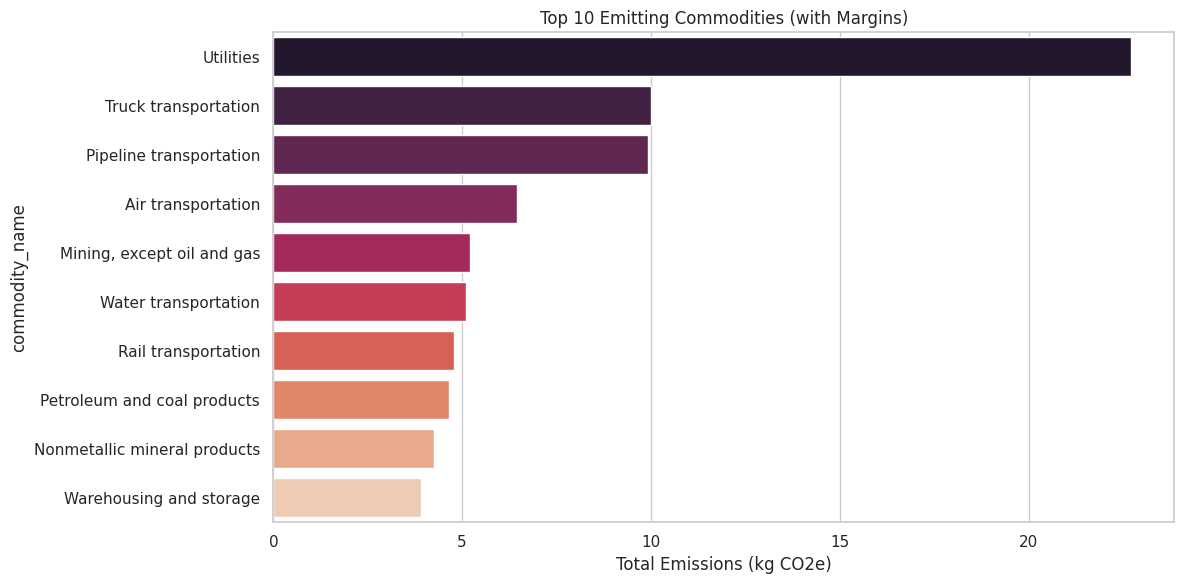

In [15]:
# Define the correct column names
emission_col = 'supply_chain_emission_factors_with_margins'
label_col = 'commodity_name'

# Filter to commodity summary rows
subset = combined_df[
    (combined_df['type'] == 'commodity') &
    (combined_df['level'] == 'summary')
]

# Group and get top 10 emitters
top_emitters = subset.groupby(label_col)[emission_col].sum().sort_values(ascending=False).head(10)

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(x=top_emitters.values, y=top_emitters.index, palette="rocket")
plt.title("Top 10 Emitting Commodities (with Margins)")
plt.xlabel("Total Emissions (kg CO2e)")
plt.tight_layout()
plt.show()


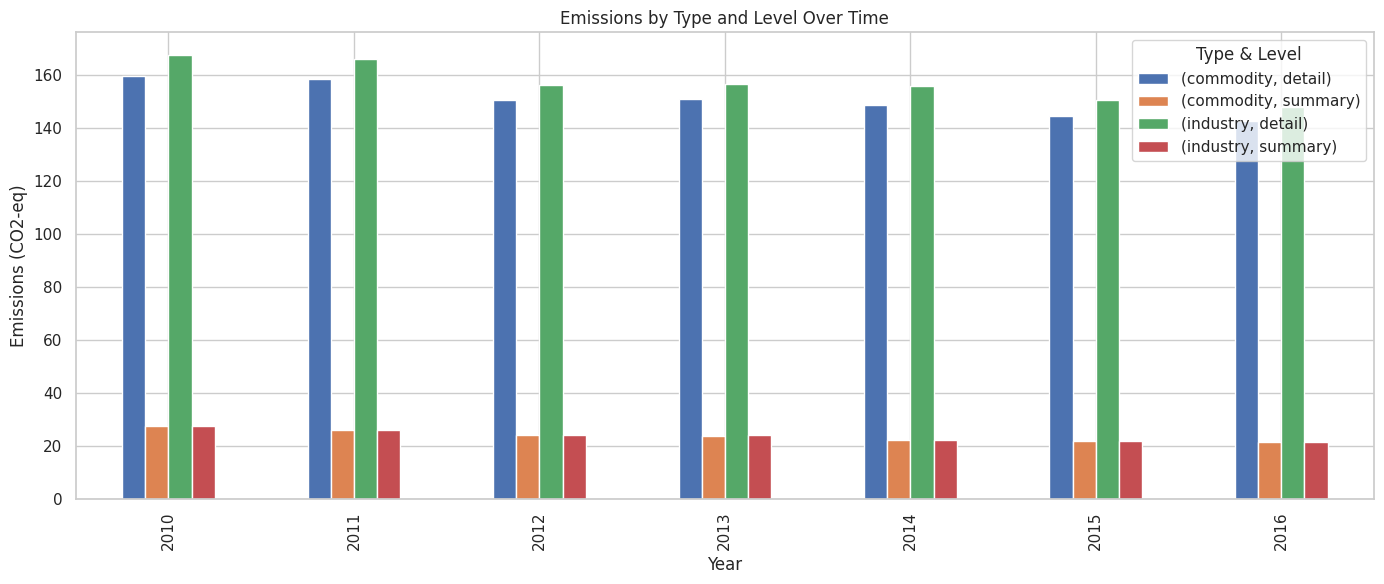

In [16]:
pivot = combined_df.pivot_table(
    index='year',
    columns=['type', 'level'],
    values=emission_col,
    aggfunc='sum'
)

pivot.plot(kind='bar', figsize=(14, 6))
plt.title("Emissions by Type and Level Over Time")
plt.ylabel("Emissions (CO2-eq)")
plt.xlabel("Year")
plt.legend(title='Type & Level')
plt.tight_layout()
plt.show()
